In [6]:
from qiskit import IBMQ, BasicAer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy

from qiskit.tools.visualization import plot_histogram as plth
from qiskit.tools.monitor import backend_overview, job_monitor

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
def phase_oracle(circ, reg):
    circ.x(qr[1])
    circ.cz(qr[0],qr[1])
    circ.x(qr[1])

In [72]:
def n_controlled_Z(circ, controls, target):
    if(len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls in not implemented')
    elif(len(controls) == 1):
        circ.h(target)
        circ.cx(controls[0], target)
        circ.h(target)
    elif(len(controls) == 2):
        circ.h(target)
        circ.ccx(controls[0], controls[1], target)

In [42]:
def IAV(circ, register, n):
    circ.h(register)
    circ.x(register)
    
    groverCircuit.barrier()
    n_controlled_Z(circ, [register[j] for j in range(n-1)], register[n-1])
    groverCircuit.barrier()
    
    circ.x(register)
    circ.h(register)   
   

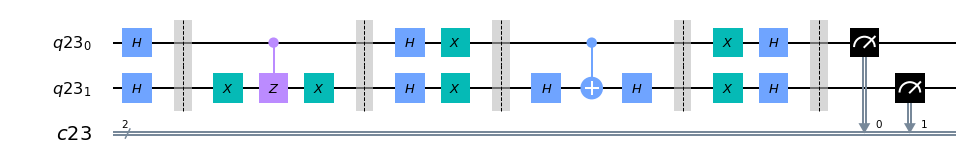

In [73]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr, cr)
groverCircuit.h(qr)

groverCircuit.barrier()
    
phase_oracle(groverCircuit, qr)

groverCircuit.barrier()
    
IAV(groverCircuit, qr, 2)

groverCircuit.barrier()

groverCircuit.measure(qr,cr)

groverCircuit.draw(output="mpl")

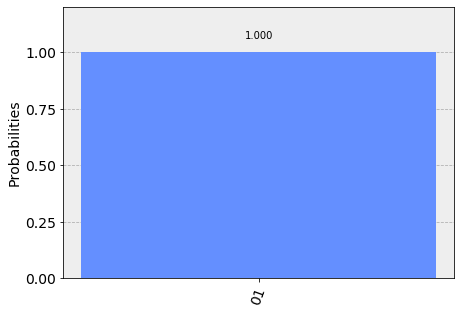

In [67]:
backend = BasicAer.get_backend('qasm_simulator')
s = 1024
results = execute(groverCircuit, backend=backend, shots=s).result()
answear = results.get_counts()
plth(answear)

In [69]:
IBMQ.load_account()
provider =  IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [70]:
shots = 1024
job = execute(groverCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


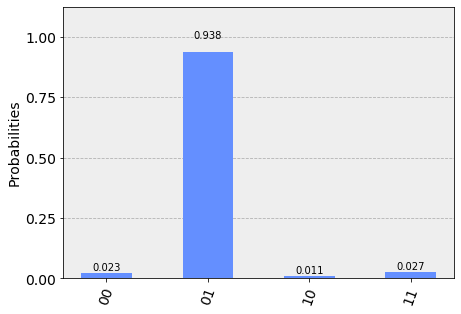

In [71]:
results = job.result()
answer = results.get_counts(groverCircuit)
plth(answer)